In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_t= pd.read_csv('/Users/krc/Documents/dev/Mini_project-modeling/data/train_transaction.csv')
train_i = pd.read_csv('/Users/krc/Documents/dev/Mini_project-modeling/data/train_identity.csv')

test_t= pd.read_csv('/Users/krc/Documents/dev/Mini_project-modeling/data/test_transaction.csv')
test_i = pd.read_csv('/Users/krc/Documents/dev/Mini_project-modeling/data/test_identity.csv')
submission = pd.read_csv('/Users/krc/Documents/dev/Mini_project-modeling/data/sample_submission.csv')

In [54]:
# C column check
cl = list(train_t.columns[train_t.columns.str.contains('C')==True].values)
cl.pop(0)
cl.append('isFraud')

In [117]:
tc = train_t.loc[:,cl]

In [56]:
tc.describe()

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,isFraud
count,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000
mean,14.092458,15.269734,0.005644,4.092185,5.571526,9.071082,2.848478,5.144574,4.480240,5.240343,10.241521,4.076227,32.539918,8.295215,0.034990
std,133.569018,154.668899,0.150536,68.848459,25.786976,71.508467,61.727304,95.378574,16.674897,95.581443,94.336292,86.666218,129.364844,49.544262,0.183755
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,1.000000,0.000000
75%,3.000000,3.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,2.000000,0.000000,2.000000,0.000000,12.000000,2.000000,0.000000
max,4685.000000,5691.000000,26.000000,2253.000000,349.000000,2253.000000,2255.000000,3331.000000,210.000000,3257.000000,3188.000000,3188.000000,2918.000000,1429.000000,1.000000


array([[<AxesSubplot:title={'center':'C1'}>,
        <AxesSubplot:title={'center':'C2'}>,
        <AxesSubplot:title={'center':'C3'}>,
        <AxesSubplot:title={'center':'C4'}>],
       [<AxesSubplot:title={'center':'C5'}>,
        <AxesSubplot:title={'center':'C6'}>,
        <AxesSubplot:title={'center':'C7'}>,
        <AxesSubplot:title={'center':'C8'}>],
       [<AxesSubplot:title={'center':'C9'}>,
        <AxesSubplot:title={'center':'C10'}>,
        <AxesSubplot:title={'center':'C11'}>,
        <AxesSubplot:title={'center':'C12'}>],
       [<AxesSubplot:title={'center':'C13'}>,
        <AxesSubplot:title={'center':'C14'}>,
        <AxesSubplot:title={'center':'isFraud'}>, <AxesSubplot:>]],
      dtype=object)

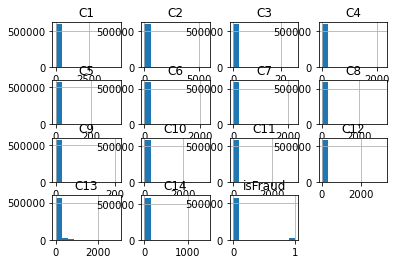

In [42]:
tc.hist()

/Users/krc/miniforge3/envs/krc2/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='C1', ylabel='Density'>

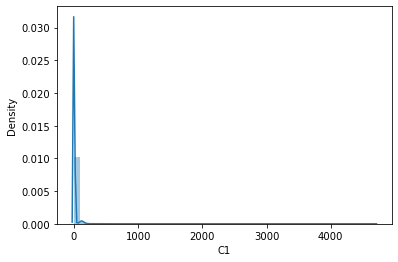

In [56]:
sns.distplot(tc.C1)

In [81]:
col_set = set([])
for i in tc.columns[:-1]:
    fenc = tc[i].quantile(.75) + (3 * (tc[i].quantile(.75) - tc[i].quantile(.25)))
    print(i,":",fenc)
    print(len(tc[i][tc[i].values > fenc]))
    col_set.update(list(tc[i][tc[i].values > fenc].index))
print(len(col_set))


C1 : 9.0
43588
C2 : 9.0
45977
C3 : 0.0
2429
C4 : 0.0
138657
C5 : 4.0
40429
C6 : 5.0
50337
C7 : 0.0
67398
C8 : 0.0
142873
C9 : 8.0
30792
C10 : 0.0
137098
C11 : 5.0
48821
C12 : 0.0
101341
C13 : 45.0
50055
C14 : 5.0
55045
247058


In [59]:
tc.C1[tc.C1.values > 6]

21        127.0
36          8.0
37         92.0
45        190.0
52          8.0
          ...  
590458     12.0
590467    105.0
590473    169.0
590487     66.0
590515      9.0
Name: C1, Length: 59535, dtype: float64

<AxesSubplot:>

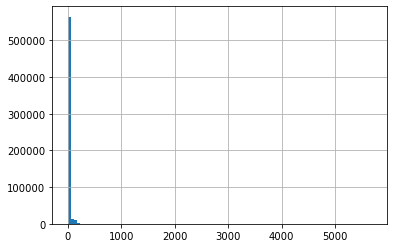

In [51]:
tc.C2.hist(bins=100)

<AxesSubplot:>

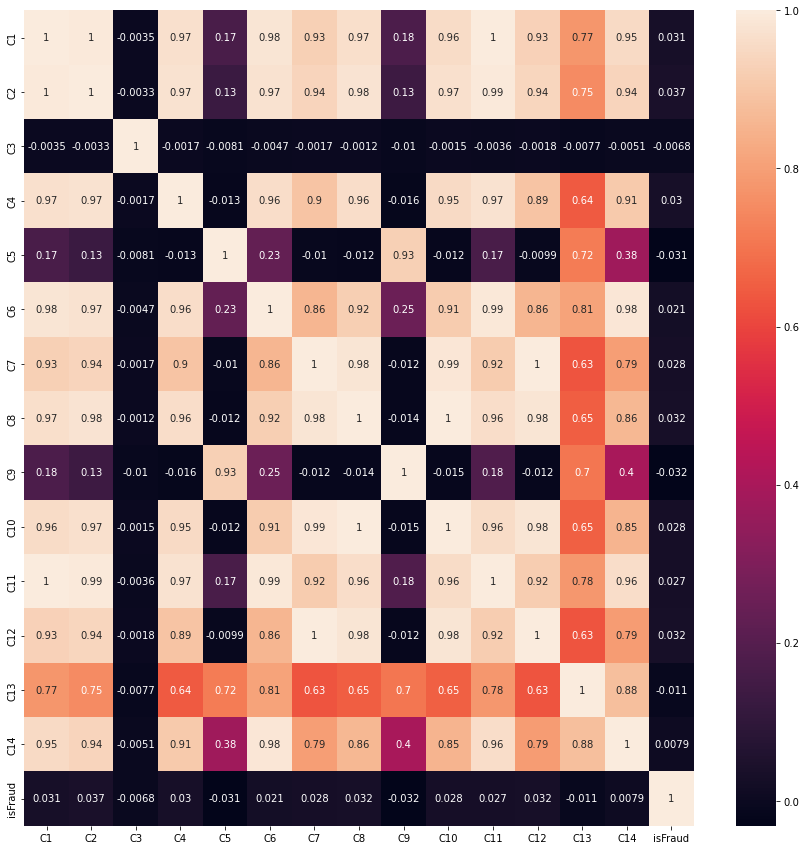

In [86]:
plt.figure(figsize=(15,15))
sns.heatmap(tc.corr(),annot=True)

In [ ]:
1,
3,9

<AxesSubplot:>

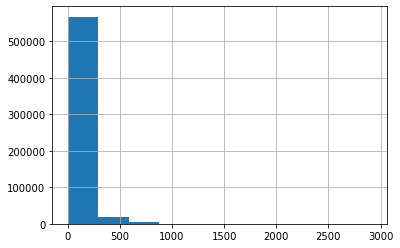

In [178]:
train_t.C13.hist()

/Users/krc/miniforge3/envs/krc2/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='C1'>

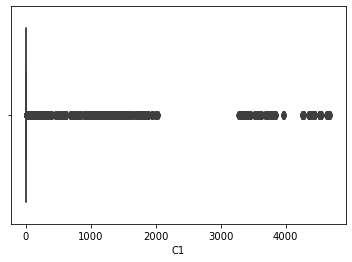

In [12]:
sns.boxplot(tc.C1)

array([[<AxesSubplot:title={'center':'C1'}>,
        <AxesSubplot:title={'center':'C2'}>,
        <AxesSubplot:title={'center':'C3'}>,
        <AxesSubplot:title={'center':'C4'}>],
       [<AxesSubplot:title={'center':'C5'}>,
        <AxesSubplot:title={'center':'C6'}>,
        <AxesSubplot:title={'center':'C7'}>,
        <AxesSubplot:title={'center':'C8'}>],
       [<AxesSubplot:title={'center':'C9'}>,
        <AxesSubplot:title={'center':'C10'}>,
        <AxesSubplot:title={'center':'C11'}>,
        <AxesSubplot:title={'center':'C12'}>],
       [<AxesSubplot:title={'center':'C13'}>,
        <AxesSubplot:title={'center':'C14'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

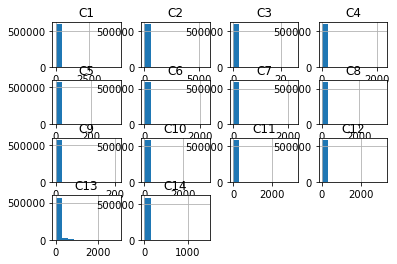

In [52]:
tc.hist()

In [69]:
tc_s = tc.loc[:,['C1','C3','C9']]

array([[<AxesSubplot:title={'center':'C1'}>,
        <AxesSubplot:title={'center':'C3'}>],
       [<AxesSubplot:title={'center':'C9'}>, <AxesSubplot:>]],
      dtype=object)

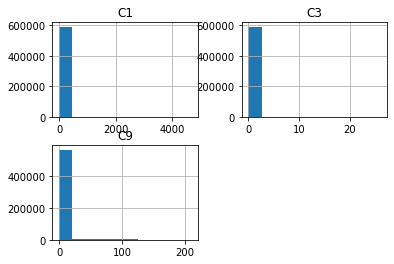

In [60]:
tc_s.hist()

In [124]:
col_set = set([])
for i in ['C1','C9']:
    fenc = tc[i].quantile(.75) + (3 * (tc[i].quantile(.75) - tc[i].quantile(.25)))
    print(i,":",fenc)
    print(len(tc[i][tc[i].values > fenc]))
    col_set.update(list(tc[i][tc[i].values > fenc].index))
print(len(col_set))


C1 : 9.0
43588
C9 : 8.0
30792
44783


In [125]:
tc_sd = tc.drop(col_set, axis=0)

array([[<AxesSubplot:title={'center':'C1'}>,
        <AxesSubplot:title={'center':'C2'}>,
        <AxesSubplot:title={'center':'C3'}>,
        <AxesSubplot:title={'center':'C4'}>],
       [<AxesSubplot:title={'center':'C5'}>,
        <AxesSubplot:title={'center':'C6'}>,
        <AxesSubplot:title={'center':'C7'}>,
        <AxesSubplot:title={'center':'C8'}>],
       [<AxesSubplot:title={'center':'C9'}>,
        <AxesSubplot:title={'center':'C10'}>,
        <AxesSubplot:title={'center':'C11'}>,
        <AxesSubplot:title={'center':'C12'}>],
       [<AxesSubplot:title={'center':'C13'}>,
        <AxesSubplot:title={'center':'C14'}>,
        <AxesSubplot:title={'center':'isFraud'}>, <AxesSubplot:>]],
      dtype=object)

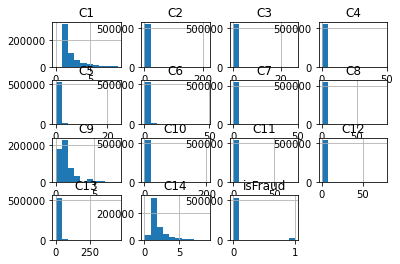

In [126]:
tc_sd.hist()

In [85]:
tc_sd.C3.nunique()

1

<AxesSubplot:xlabel='isFraud', ylabel='C3'>

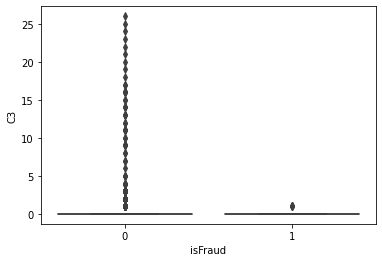

In [127]:
sns.boxplot(data=tc,x='isFraud', y='C3')

<AxesSubplot:>

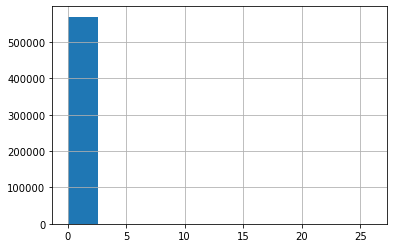

In [128]:
tc.C3[tc.isFraud==0].hist()

/Users/krc/miniforge3/envs/krc2/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='C3'>

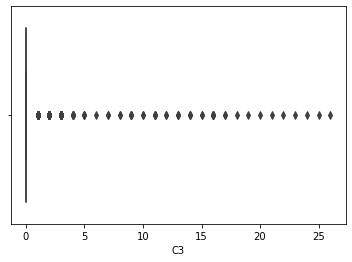

In [129]:
sns.boxplot(tc_sd.C3)

<AxesSubplot:xlabel='isFraud', ylabel='C1'>

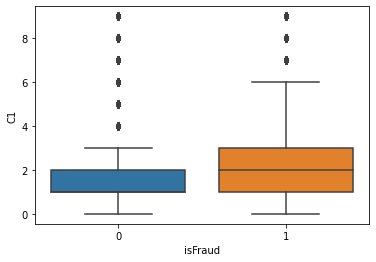

In [131]:
sns.boxplot(data=tc_sd,x='isFraud', y='C1')

<AxesSubplot:xlabel='isFraud', ylabel='C9'>

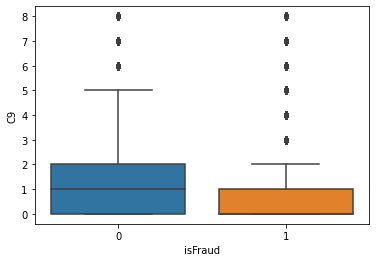

In [133]:
sns.boxplot(data=tc_sd,x='isFraud', y='C9')

In [100]:
tc.C1[tc.isFraud==0]

0         1.0
1         1.0
2         1.0
3         2.0
4         1.0
         ... 
590535    2.0
590536    1.0
590537    1.0
590538    1.0
590539    2.0
Name: C1, Length: 569877, dtype: float64

In [140]:
tc_s = tc.loc[:,['C1','C9','isFraud']].drop(col_set, axis=0)

In [135]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.9)

#fit()과 transform()을 호출해 PCA 변환 데이터 반환
pca.fit(tc_s)
tc_spc = pca.transform(tc_s)
print(tc_spc.shape)

(545757, 2)


<AxesSubplot:>

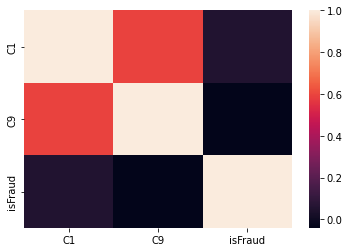

In [142]:
sns.heatmap(tc_s.corr())

In [47]:
tc_df = pd.DataFrame(tc_ru)

array([[<AxesSubplot:title={'center':'0'}>,
        <AxesSubplot:title={'center':'1'}>,
        <AxesSubplot:title={'center':'2'}>,
        <AxesSubplot:title={'center':'3'}>],
       [<AxesSubplot:title={'center':'4'}>,
        <AxesSubplot:title={'center':'5'}>,
        <AxesSubplot:title={'center':'6'}>,
        <AxesSubplot:title={'center':'7'}>],
       [<AxesSubplot:title={'center':'8'}>,
        <AxesSubplot:title={'center':'9'}>,
        <AxesSubplot:title={'center':'10'}>,
        <AxesSubplot:title={'center':'11'}>],
       [<AxesSubplot:title={'center':'12'}>,
        <AxesSubplot:title={'center':'13'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

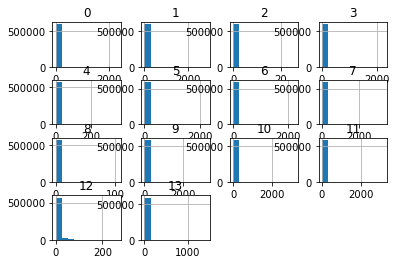

In [48]:
tc_df.hist()

C1     0
C2     0
C3     0
C4     0
C5     0
C6     0
C7     0
C8     0
C9     0
C10    0
C11    0
C12    0
C13    0
C14    0
dtype: int64

In [148]:
am = train_t.TransactionAmt

In [149]:

fenc = am.quantile(.75) + (3 * (am.quantile(.75) - am.quantile(.25)))
print(i,":",fenc)
print(len(am[am.values > fenc]))


C9 : 370.03700000000003
36422


(0.0, 370.0)

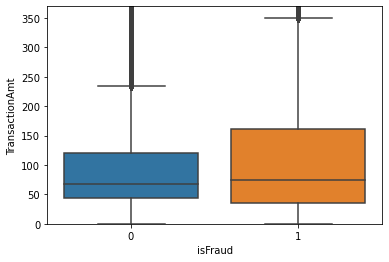

In [158]:
sns.boxplot(data=train_t, x='isFraud', y='TransactionAmt')
plt.ylim(0,370)

<AxesSubplot:xlabel='addr2', ylabel='Count'>

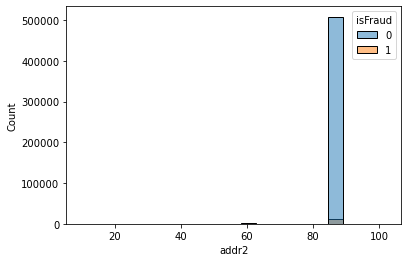

In [168]:
sns.histplot(data=train_t, x='addr2', hue='isFraud')

<AxesSubplot:xlabel='P_emaildomain', ylabel='Count'>

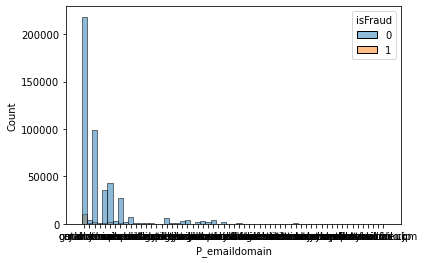

In [173]:
sns.histplot(data=train_t, x='P_emaildomain', hue='isFraud')

In [174]:
train_t.P_emaildomain.isnull().sum()

94456

In [177]:
train_t.P_emaildomain.value_counts()

gmail.com           228355
yahoo.com           100934
hotmail.com          45250
anonymous.com        36998
aol.com              28289
comcast.net           7888
icloud.com            6267
outlook.com           5096
msn.com               4092
att.net               4033
live.com              3041
sbcglobal.net         2970
verizon.net           2705
ymail.com             2396
bellsouth.net         1909
yahoo.com.mx          1543
me.com                1522
cox.net               1393
optonline.net         1011
charter.net            816
live.com.mx            749
rocketmail.com         664
mail.com               559
earthlink.net          514
gmail                  496
outlook.es             438
mac.com                436
juno.com               322
aim.com                315
hotmail.es             305
roadrunner.com         305
windstream.net         305
hotmail.fr             295
frontier.com           280
embarqmail.com         260
web.de                 240
netzero.com            230
t